In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from xgboost import XGBRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [180]:
traffic_data = pd.read_csv("traffic_data.csv")

In [181]:
def round_near(x):
    val = int(x[14:16])
    if(val in (59,1)):
        return x[0:14]+'00:00'
    else:
        return -1

In [182]:
traffic_data['new_date'] = traffic_data['data_as_of'].apply(lambda x: round_near(x))

In [183]:
temp = traffic_data[traffic_data['new_date'] != -1]

In [184]:
traffic_data.to_csv('cleaned_traffic_data.csv',index = False)

In [185]:
traffic_data = temp

In [117]:
poll_1 = pd.read_csv('pollution_and_traffic_data1_4.csv')
poll_2 = pd.read_csv('pollution_and_traffic_data5_9.csv')

In [118]:
poll = poll_1.append(poll_2,ignore_index=True)

In [119]:
poll.to_csv('latest_pollution_data.csv',index = False)

In [193]:
traffic_data['data_point'] = traffic_data['data_point'].apply(lambda x:[float(i) for i in x.split(',')])

In [194]:
traffic_data[['lat','long']] = pd.DataFrame(traffic_data.data_point.values.tolist(), index= traffic_data.index)

In [195]:
traffic_data.columns

Index(['borough', 'data_as_of', 'encoded_poly_line', 'encoded_poly_line_lvls',
       'id', 'link_id', 'link_name', 'link_points', 'owner', 'speed', 'status',
       'transcom_id', 'travel_time', 'minutes', 'data_point', 'new_date',
       'datetime', 'lat', 'long'],
      dtype='object')

In [159]:
poll.columns

Index(['datetime', 'lat', 'long', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype='object')

In [196]:
traffic_data = traffic_data[['new_date','lat','long','speed']]

In [197]:
traffic_data.to_csv("cleaned_traffic_data.csv",index = False)

In [137]:
poll.columns

Index(['datetime', 'lat', 'long', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype='object')

In [139]:
temp = pd.read_csv('cleaned_traffic_data.csv')

In [157]:
temp['datetime_new_date'] = temp['new_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f'))

In [210]:
traffic_data['datetime'] = traffic_data['new_date']

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [211]:
combined = traffic_data.merge(poll,on=['datetime','lat','long'])

In [213]:
combined.to_csv('combined.csv',index = False)

In [257]:
a=combined.groupby(['lat','long'])

In [258]:
def normalize(x):
    col = ['no2','o3','pm10','pm25','so2','co']
    for c in col:
        x[c+'_normal'] = (x[c]-x[c].mean())/(x[c].var())
        x['lat'] = x['lat']
        x['long'] = x['long']
        x['datetime'] = x['datetime']
    return x

In [259]:
res = a.apply(lambda x:normalize(x))

In [260]:
res = res.dropna()

In [261]:
len(res)

103

In [262]:
res.to_csv('combined_normalized.csv',index = False)

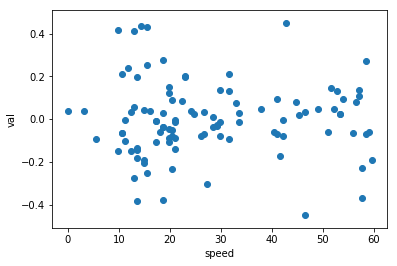

In [242]:
plt.scatter(res['speed'],res['no2_normal'])
plt.xlabel('speed')
plt.ylabel('val')
plt.show()

In [294]:
res[['lat','long','co','no2','pm10','pm25']].groupby(['lat','long']).mean()

,,co,no2,pm10,pm25
lat,long,,,,
40.66579,-73.757060,247.863000,33.517000,39.614500,16.010500
40.66642,-73.789580,227.796667,46.336667,49.360000,13.953333
40.67374,-73.801540,232.901818,33.881818,43.361818,14.882727
40.69236,-73.999390,230.540000,28.780000,45.640000,14.765000
40.70158,-73.990330,355.380000,49.955000,63.360000,15.655000
40.70895,-73.996941,300.252000,26.160000,43.076000,16.632000
40.73868,-73.973391,219.730000,43.325000,41.775000,13.305000
40.73895,-74.010120,238.092222,24.462778,36.100000,14.258333
40.74137,-74.008930,251.336000,28.346000,41.740500,16.704000


In [271]:
one = res.groupby(['lat','long']).get_group((40.66579,-73.757060))
two = res.groupby(['lat','long']).get_group((40.74137,-74.008930))
three = res.groupby(['lat','long']).get_group((40.76212,-74.9100000))

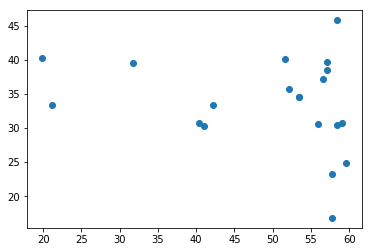

In [289]:
plt.scatter(one['speed'],one['no2'])
plt.show()

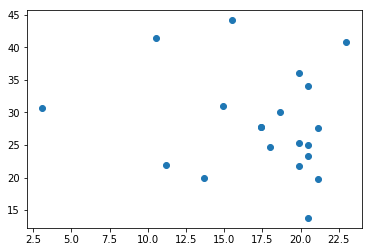

In [290]:
plt.scatter(two['speed'],two['no2'])
plt.show()

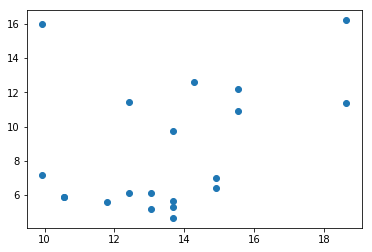

In [288]:
plt.scatter(three['speed'],three['pm25'])
plt.show()

In [296]:
ml = res

In [298]:
ml.head()

,new_date,lat,long,speed,datetime,co,no2,o3,pm10,pm25,so2,no2_normal,o3_normal,pm10_normal,pm25_normal,so2_normal,co_normal
2,2018-07-01T05:00:00,40.70158,-73.990330,33.55,2018-07-01T05:00:00,412.11,66.61,26.70,79.33,20.09,0.07,0.030021,-3.846154,0.031309,0.112740,33.333333,0.008814
4,2018-07-02T06:00:00,40.66579,-73.757060,31.68,2018-07-02T06:00:00,414.54,39.52,14.46,63.54,29.13,0.83,0.132375,-0.149629,0.112642,0.459293,7.205360,0.016624
5,2018-07-02T06:00:00,40.70895,-73.996941,32.93,2018-07-02T06:00:00,455.08,44.86,21.06,50.80,26.16,1.27,0.074749,-0.086980,0.021953,0.072515,1.655860,0.007551
6,2018-07-02T06:00:00,40.76212,-74.910000,18.64,2018-07-02T06:00:00,333.47,8.91,24.92,17.26,16.20,0.02,0.278626,-0.071400,0.011558,0.564809,-36.251403,0.013018
7,2018-07-02T06:00:00,40.74137,-74.008930,15.53,2018-07-02T06:00:00,455.69,44.17,21.29,50.39,26.33,1.44,0.253112,-0.070668,0.041340,0.311255,3.591401,0.016858


In [376]:
ml.describe()

,lat,long,speed,co,no2,o3,pm10,pm25,so2,no2_normal,o3_normal,pm10_normal,pm25_normal,so2_normal,co_normal
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02
mean,40.717545,-74.104840,28.252621,244.679126,25.945631,30.529709,36.368447,14.15932,0.260194,-3.981443e-17,9.215929e-16,-2.506086e-17,1.994090e-17,-3.380252e-15,-2.096826e-18
std,0.037691,0.410421,15.939517,97.500779,14.393457,9.328464,16.369510,5.83476,0.409114,1.718783e-01,5.532735e-01,1.014371e-01,3.091574e-01,4.245625e+01,1.410506e-02
min,40.665790,-74.910000,0.000000,75.400000,0.590000,14.460000,4.360000,0.46000,0.000000,-4.484305e-01,-3.846154e+00,-3.257329e-01,-1.333333e+00,-2.000000e+02,-5.040323e-02
25%,40.673740,-74.010120,15.530000,191.315000,13.750000,24.555000,23.260000,11.18500,0.020000,-8.496933e-02,-7.622923e-02,-5.527126e-02,-1.401321e-01,-2.625788e+00,-6.226579e-03
50%,40.738950,-74.008930,22.360000,236.520000,27.610000,29.870000,36.830000,13.08000,0.040000,-8.093708e-03,-1.456985e-02,-1.300258e-02,-6.964917e-02,-1.236812e+00,-4.092194e-04
75%,40.741370,-73.801540,41.320000,297.600000,36.630000,33.080000,47.550000,16.10000,0.430000,8.310615e-02,6.326920e-02,4.656760e-02,1.150242e-01,3.442802e+00,6.213241e-03
max,40.762120,-73.757060,59.650000,457.260000,66.610000,71.290000,79.330000,29.13000,1.440000,4.484305e-01,3.846154e+00,3.257329e-01,1.333333e+00,1.343434e+02,5.040323e-02


## Predict speed

In [333]:
#split test train
x_col_speed = ['lat','long','co','no2','o3','pm10','pm25','so2','co_normal','no2_normal','o3_normal','pm10_normal','pm25_normal','so2_normal']
y_col_speed = ['speed']
X_train_speed,X_test_speed,y_train_speed,y_test_speed = train_test_split(ml[x_col_speed],ml[y_col_speed],test_size = 0.2,random_state = 5)

In [363]:
#model train
model = XGBRegressor()
model.fit(X_train_speed.values,y_train_speed.values)
y_pred_speed = model.predict(X_test_speed.values)

In [335]:
accuracy_speed = mean_absolute_error(y_test_speed.values,y_pred_speed)
print(accuracy_speed)

8.11050497327532


In [371]:
rand_pred_speed =  np.random.uniform(low=min(y_test_speed.speed), high=max(y_test_speed.speed), size=(len(y_test_speed),))
rand_accuracy_speed = mean_absolute_error(y_test_speed.values,rand_pred_speed)
print(rand_accuracy_speed)

13.523187209644385


## Predict pollution

In [372]:
#split test train
x_col_poll = ['lat','long','speed']
var = 'pm25'
y_col_poll = ['pm25']
X_train_poll,X_test_poll,y_train_poll,y_test_poll = train_test_split(ml[x_col_poll],ml[y_col_poll],test_size = 0.2,random_state = 5)

In [373]:
#model train
model_poll = XGBRegressor()
model_poll.fit(X_train_poll.values,y_train_poll.values)
y_pred_poll = model_poll.predict(X_test_poll.values)

In [374]:
accuracy_poll = mean_absolute_error(y_test_poll.values,y_pred_poll)
print(accuracy_poll)

3.942538477579753


In [375]:
rand_pred_poll =  np.random.uniform(low=min(y_test_poll[var]), high=max(y_test_poll[var]), size=(len(y_test_poll),))
rand_accuracy_poll = mean_absolute_error(y_test_poll.values,rand_pred_poll)
print(rand_accuracy_poll)

5.912070159141585
